In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

Buck Converter
=========
#### Conversor abaixador

O conversor de buck tem uma estrutura simples e de operação direta, uma ótima opção de conversor CC-CC PWM. A tensão de saída de um conversor buck é sempre menor que a tensão de entrada, por isso ele é conhecido também como conversor abaixador.

O conversor buck é composto por uma fonte de tensão contínua, um transistor que funciona como uma chave, um diodo, um indutor, um capacitor e a carga. A chave irá controlar em qual estado estará o circuito, on-time ou off-time. Durante o período on-time, a chave é fechada e o diodo está no estado desligado. Neste intervalo a fonte de tensão transfere energia para o indutor e a corrente sobre ele aumenta. Já no período off-time, a chave estará aberta e o diodo ligado. Assim, a energia armazenada no indutor é liberada para a carga e a corrente no indutor diminui. 

O estado estacionário no conversor é atingido quando a transferência de energia dentro do tempo torna-se a mesma que a liberação de energia fora do tempo. Nesse estado a corrente no indutor estabele uma forma de onda triangular periódica e a tensão de saída torna-se quase constante com um pequeno componente de ondulação. 

#### Esquemático de um conversor buck

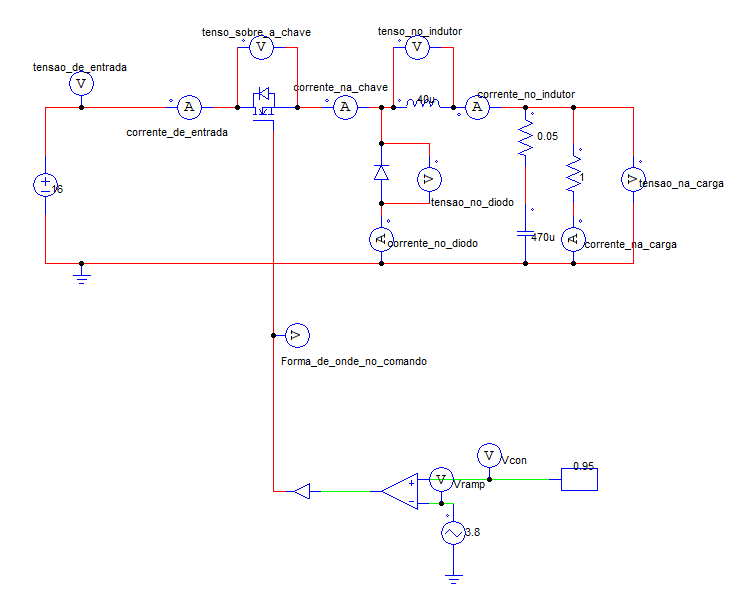

#### Ganho estático do conversor 



#### Etapas do projeto:

  1. Definir parâmetros de projeto (Vin, Vout, Po, fs, variação de IL e de Vc)
  2. Calcular a razão cíclica (D=Vout/Vin)
  3. Calcular indutância (L=(Vin - Vout).D/fs.(variação de IL)
  4. Calcular a capacitância (C=variação de IL/8.fs.variação de Vc)
  5. Calcular os esforços nos semicondutores (Ismd, Isef, Ismax, Idmds, Idef, Idmax, Vsmax e Vdmax)

#### Tensão de Entrada:

In [2]:
Vin = 75
print("A tensão de entrada é", Vin, "V")

A tensão de entrada é 75 V


#### Tensão de Saída: 

In [3]:
Vout = 30
print("A tensão de saída é", Vout, "V")

A tensão de saída é 30 V


#### Potência máxima de saída:

In [4]:
Po = 20
print("A potência máxima de saída é", Po, "W")

A potência máxima de saída é 20 W


#### Frequência de comutação: 

In [5]:
fs = 20000
print("A frequência de comutação é", fs, "Hz")

A frequência de comutação é 20000 Hz


#### Razão ciclíca:

$$D = {Vout \over Vin}$$

In [6]:
D = Vout/Vin
print("A razão ciclíca é", D)

A razão ciclíca é 0.4


#### Corrente de saída:

$$Io = {Po \over Vout}$$

In [7]:
Io = Po/Vout
print("A corrente de saída é", Io, "A")

A corrente de saída é 0.6666666666666666 A


#### Ondulação de corrente no indutor:

###### Ondulação de 10%:
$$\Delta_{Il} = 0.1Io$$

In [8]:
delta_Il = 0.1*Io
print("A ondulação de corrente no indutor é", delta_Il, "A")

A ondulação de corrente no indutor é 0.06666666666666667 A


#### Ondulação de tensão no capacitor:

###### Ondulação de 1%:
$$\Delta_{Vc} = 0.01Vout$$

In [9]:
delta_Vc = 0.01*Vout
print("A ondulação de tensão no capacitor é", delta_Vc, "V")

A ondulação de tensão no capacitor é 0.3 V


#### Resistência de carga:

$$Ro = {Vout^2 \over Po}$$

In [10]:
Ro = (Vout**2)/Po
print("A resistência de carga é", Ro, "ohms")

A resistência de carga é 45.0 ohms


#### Indutor de Saída:

$$Lo = {(Vin-Vout)D \over fs\Delta_{Il}}$$

In [11]:
Lo = (Vin-Vout)*D/(fs*delta_Il)
print("O indutor de saída é", Lo, "H")

O indutor de saída é 0.013500000000000002 H


#### Capacitor de Saída:

$$Co = {\Delta_{Il} \over 8fs\Delta_{Vc}}$$

In [12]:
Co = delta_Il/(8*fs*delta_Vc)
print("O capacitor de saída é", Co, "F")

O capacitor de saída é 1.388888888888889e-06 F


### Esforços na chave:

#### Valor médio da corrente na chave:

$$Is_{md} = DIo$$

In [13]:
Is_md = D*Io 
print("O valor médio da corrente na chave é", Is_md, "A")

O valor médio da corrente na chave é 0.26666666666666666 A


#### Valor eficaz da corrente na chave:

$$Is_{ef} = \sqrt{D}Io$$

In [14]:
Is_ef = (D**0.5)*Io 
print("O valor eficaz da corrente na chave é", Is_ef, "A")

O valor eficaz da corrente na chave é 0.4216370213557839 A


#### Valor máximo da corrente na chave:

$$Is_{max} = Io + {\Delta_{Il} \over 2}$$

In [15]:
Is_max = Io + delta_Il/2 
print("O valor máximo da corrente na chave é", Is_max, "A")

O valor máximo da corrente na chave é 0.7 A


#### Valor máximo da tensão na chave:

$$Vs_{max} = Vin$$

In [16]:
Vs_max = Vin
print("O valor máximo da tensão na chave é", Vs_max, "V")

O valor máximo da tensão na chave é 75 V


### Esforços no diodo:

#### Valor médio da corrente no diodo:

$$Id_{md} = (1-D)Io$$

In [17]:
Id_md = (1-D)*Io 
print("O valor médio da corrente no diodo é", Id_md, "A")

O valor médio da corrente no diodo é 0.39999999999999997 A


#### Valor eficaz da corrente no diodo:

$$Id_{ef} = \sqrt{(1-D)}Io$$

In [18]:
Id_ef = ((1-D)**0.5)*Io 
print("O valor eficaz da corrente no diodo é", Id_ef, "A")

O valor eficaz da corrente no diodo é 0.5163977794943222 A


#### Valor máximo da corrente no diodo:

$$Id_{max} = Io + {\Delta_{Il} \over s}$$

In [19]:
Id_max = Io + delta_Il/2 
print("O valor máximo da corrente no diodo é", Id_max, "A")

O valor máximo da corrente no diodo é 0.7 A


#### Valor máximo da tensão no diodo:

$$Vd_{max} = Vin$$

In [20]:
Vd_max = Vin
print("O valor máximo da tensão no diodo é", Vd_max, "V")

O valor máximo da tensão no diodo é 75 V


#### Resistência crítica:

$$Rcrit = {2Lofs \over (1-D)}$$

In [21]:
Rcrit = 2*Lo*fs/(1-D)
print("A resistência crítica é", Rcrit, "ohms")

A resistência crítica é 900.0000000000002 ohms


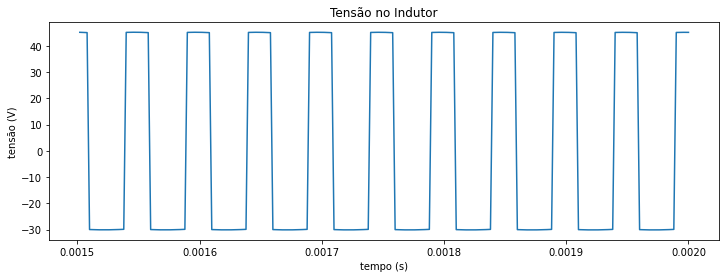

In [9]:
import numpy  as np
import matplotlib.pyplot as plt

data = np.loadtxt('dados/tensao_no_indutor.txt')


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(x, y,'-')

plt.title('Tensão no Indutor')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.show()

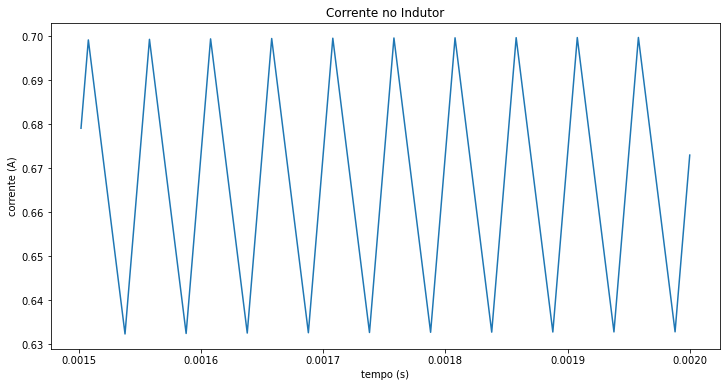

In [44]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/corrente_no_indutor.txt')


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,6))#altera as dimensões do gráfico
plt.plot(x, y,'-')

plt.title('Corrente no Indutor')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A)')
plt.show()

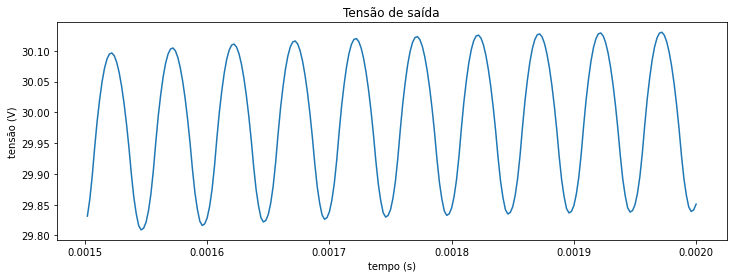

In [43]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/vout.txt')


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(x, y,'-')

plt.title('Tensão de saída')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.show()

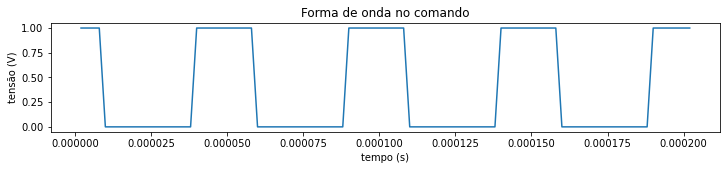

In [40]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/forma_de_onda_no_comando.csv', delimiter=',', skiprows=1)


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,2))#altera as dimensões do gráfico
plt.plot(x, y,'-')

plt.title('Forma de onda no comando')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.show()

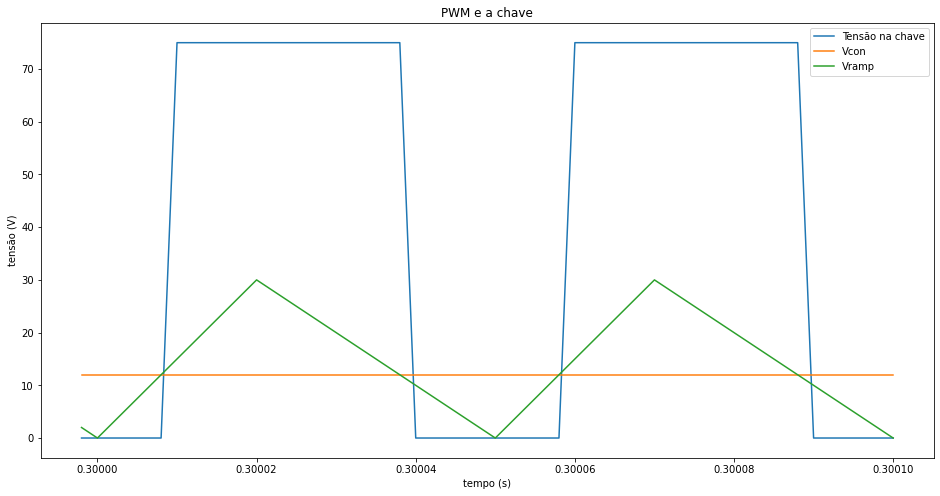

In [30]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/PWM.csv', delimiter=',', skiprows=1)


x = data[:, 0]#tempo
y = data[:, 1]#tensão sobre a chave
z = data[:, 2]#Vcon
g = data[:, 3]#Vramp
plt.figure(figsize=(16,8))#altera as dimensões do gráfico
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,g)

plt.title('PWM e a chave')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.legend(['Tensão na chave','Vcon','Vramp'], loc = 'best', fontsize=10)
plt.show()

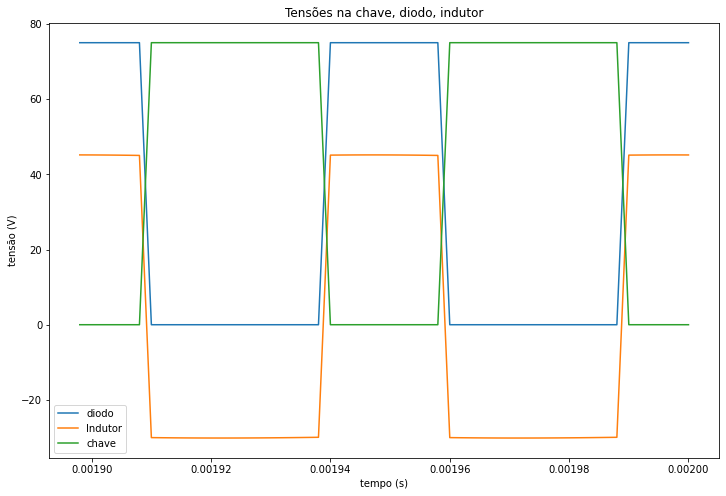

In [33]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/Tensoes_chave_diodo_indutor.csv', delimiter=',', skiprows=1)


x = data[:, 0]#tempo
y = data[:, 1]#tensão no diodo
z = data[:, 2]#tensão no indutor
g = data[:, 3]#tensão sobre a chave
plt.figure(figsize=(12,8))#altera as dimensões do gráfico
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,g)

plt.title('Tensões na chave, diodo, indutor')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.legend(['diodo','Indutor','chave'], loc = 'best')
plt.show()

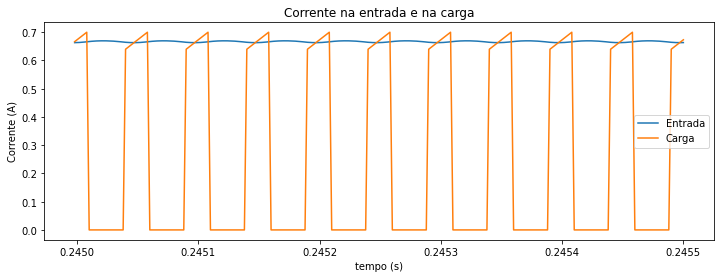

In [2]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/30V-20W/corrente_entrada_e_na_carga.csv', delimiter=',', skiprows=1)


x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(x,y)
plt.plot(x,z)

plt.title('Corrente na entrada e na carga')
plt.xlabel('tempo (s)')
plt.ylabel('Corrente (A)')
plt.legend(['Entrada','Carga'], loc = 'best')
plt.show()

#### Segunda opção de projeto:
- Alteração da tensão de saída para 45V.
- Alteração da potência para 30W. 

In [29]:
Vin = 75
print("A tensão de entrada é", Vin, "V")
Vout2 = 45
print("A tensão de saída é", Vout2, "V")
Po2 = 30
print("A potência máxima de saída é", Po2, "W")
fs = 20000
print("A frequência de comutação é", fs, "Hz")
D2 = Vout2/Vin
print("A razão ciclíca é", D2)
Io2 = Po2/Vout2
print("A corrente de saída é", Io2, "A")
delta_Il2 = 0.1*Io2
print("A ondulação de corrente no indutor é", delta_Il2, "A")
delta_Vc2 = 0.01*Vout2
print("A ondulação de tensão no capacitor é", delta_Vc2, "V")
Ro2 = (Vout2**2)/Po2
print("A resistência de carga é", Ro2, "ohms")
Lo2 = (Vin-Vout2)*D2/(fs*delta_Il2)
print("O indutor de saída é", Lo2, "H")
Co2 = delta_Il2/(8*fs*delta_Vc2)
print("O capacitor de saída é", Co2, "F")
Is_md2 = D2*Io2
print("O valor médio da corrente na chave é", Is_md2, "A")
Is_ef2 = (D2**0.5)*Io2 
print("O valor eficaz da corrente na chave é", Is_ef2, "A")
Is_max2 = Io2 + delta_Il2/2 
print("O valor máximo da corrente na chave é", Is_max2, "A")
Vs_max2 = Vin
print("O valor máximo da tensão na chave é", Vs_max2, "V")
Id_md2 = (1-D2)*Io2 
print("O valor médio da corrente no diodo é", Id_md2, "A")
Id_ef2 = ((1-D2)**0.5)*Io2 
print("O valor eficaz da corrente no diodo é", Id_ef2, "A")
Id_max2 = Io2 + delta_Il2/2 
print("O valor máximo da corrente no diodo é", Id_max2, "A")
Vd_max2 = Vin
print("O valor máximo da tensão no diodo é", Vd_max2, "V")
Rcrit2 = 2*Lo2*fs/(1-D2)
print("A resistência crítica é", Rcrit2, "ohms")

A tensão de entrada é 75 V
A tensão de saída é 45 V
A potência máxima de saída é 30 W
A frequência de comutação é 20000 Hz
A razão ciclíca é 0.6
A corrente de saída é 0.6666666666666666 A
A ondulação de corrente no indutor é 0.06666666666666667 A
A ondulação de tensão no capacitor é 0.45 V
A resistência de carga é 67.5 ohms
O indutor de saída é 0.013500000000000002 H
O capacitor de saída é 9.259259259259259e-07 F
O valor médio da corrente na chave é 0.39999999999999997 A
O valor eficaz da corrente na chave é 0.5163977794943222 A
O valor máximo da corrente na chave é 0.7 A
O valor máximo da tensão na chave é 75 V
O valor médio da corrente no diodo é 0.26666666666666666 A
O valor eficaz da corrente no diodo é 0.4216370213557839 A
O valor máximo da corrente no diodo é 0.7 A
O valor máximo da tensão no diodo é 75 V
A resistência crítica é 1350.0000000000002 ohms


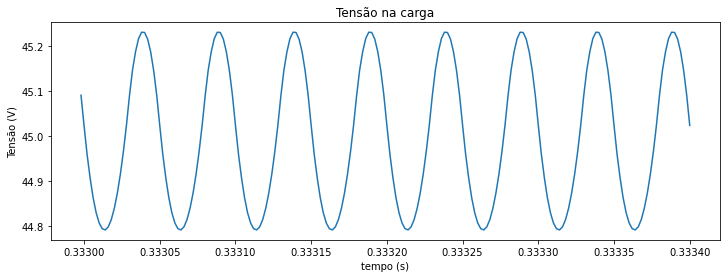

In [9]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/45V-30W/Tensão_na_carga_1.csv', delimiter=',', skiprows=1)


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(x,y)


plt.title('Tensão na carga')
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
#plt.legend(['Entrada'], loc = 'best')
plt.show()

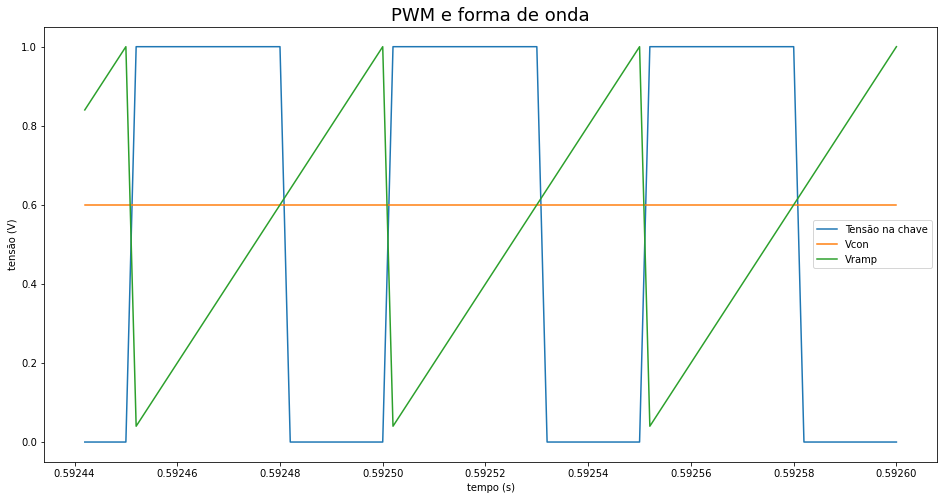

In [12]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/45V-30W/Vcon_forma_de_onda_Vramp.csv', delimiter=',', skiprows=1)


x = data[:, 0]#tempo
y = data[:, 1]#tensão sobre a chave
z = data[:, 2]#Vcon
g = data[:, 3]#Vramp
plt.figure(figsize=(16,8))#altera as dimensões do gráfico
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,g)

plt.title('PWM e forma de onda', fontsize=18)
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.legend(['Tensão na chave','Vcon','Vramp'], loc = 'best', fontsize=10)
plt.show()

#### Terceira opção de projeto:
- Alteração da tensão de saída para 15V.

In [31]:
Vin = 75
print("A tensão de entrada é", Vin, "V")
Vout3 = 15
print("A tensão de saída é", Vout3, "V")
Po = 20
print("A potência máxima de saída é", Po, "W")
fs = 20000
print("A frequência de comutação é", fs, "Hz")
D3 = Vout3/Vin
print("A razão ciclíca é", D3)
Io3 = Po/Vout3
print("A corrente de saída é", Io3, "A")
delta_Il3 = 0.1*Io3
print("A ondulação de corrente no indutor é", delta_Il3, "A")
delta_Vc3 = 0.01*Vout3
print("A ondulação de tensão no capacitor é", delta_Vc3, "V")
Ro3 = (Vout3**2)/Po
print("A resistência de carga é", Ro3, "ohms")
Lo3 = (Vin-Vout3)*D3/(fs*delta_Il3)
print("O indutor de saída é", Lo3, "H")
Co3 = delta_Il3/(8*fs*delta_Vc3)
print("O capacitor de saída é", Co3, "F")
Is_md3 = D3*Io3
print("O valor médio da corrente na chave é", Is_md3, "A")
Is_ef3 = (D3**0.5)*Io3 
print("O valor eficaz da corrente na chave é", Is_ef3, "A")
Is_max3 = Io3 + delta_Il3/2 
print("O valor máximo da corrente na chave é", Is_max3, "A")
Vs_max3 = Vin
print("O valor máximo da tensão na chave é", Vs_max3, "V")
Id_md3 = (1-D3)*Io3 
print("O valor médio da corrente no diodo é", Id_md3, "A")
Id_ef3 = ((1-D3)**0.5)*Io3
print("O valor eficaz da corrente no diodo é", Id_ef3, "A")
Id_max3 = Io3 + delta_Il3/2 
print("O valor máximo da corrente no diodo é", Id_max3, "A")
Vd_max3 = Vin
print("O valor máximo da tensão no diodo é", Vd_max3, "V")
Rcrit3 = 2*Lo3*fs/(1-D3)
print("A resistência crítica é", Rcrit3, "ohms")

A tensão de entrada é 75 V
A tensão de saída é 15 V
A potência máxima de saída é 20 W
A frequência de comutação é 20000 Hz
A razão ciclíca é 0.2
A corrente de saída é 1.3333333333333333 A
A ondulação de corrente no indutor é 0.13333333333333333 A
A ondulação de tensão no capacitor é 0.15 V
A resistência de carga é 11.25 ohms
O indutor de saída é 0.0045000000000000005 H
O capacitor de saída é 5.555555555555556e-06 F
O valor médio da corrente na chave é 0.26666666666666666 A
O valor eficaz da corrente na chave é 0.5962847939999438 A
O valor máximo da corrente na chave é 1.4 A
O valor máximo da tensão na chave é 75 V
O valor médio da corrente no diodo é 1.0666666666666667 A
O valor eficaz da corrente no diodo é 1.1925695879998877 A
O valor máximo da corrente no diodo é 1.4 A
O valor máximo da tensão no diodo é 75 V
A resistência crítica é 225.00000000000003 ohms


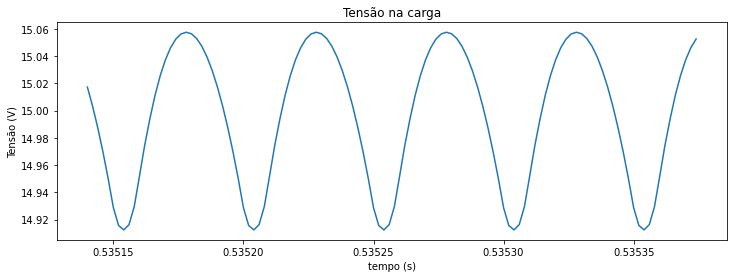

In [15]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/15V-20W/Tensão_na_carga_1.csv', delimiter=',', skiprows=1)


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(x,y)


plt.title('Tensão na carga')
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
#plt.legend(['Entrada'], loc = 'best')
plt.show()

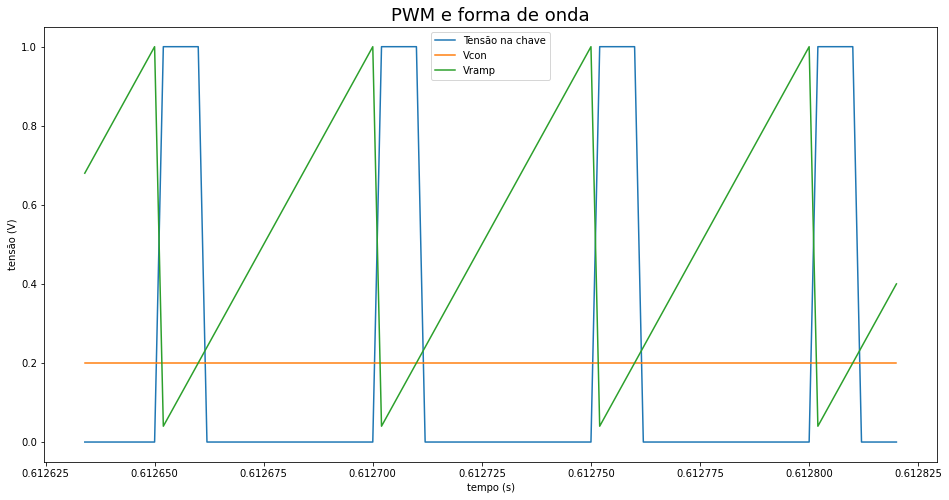

In [13]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/15V-20W/Vcon_forma_de_onda_Vramp.csv', delimiter=',', skiprows=1)


x = data[:, 0]#tempo
y = data[:, 1]#tensão sobre a chave
z = data[:, 2]#Vcon
g = data[:, 3]#Vramp
plt.figure(figsize=(16,8))#altera as dimensões do gráfico
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,g)

plt.title('PWM e forma de onda', fontsize=18)
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.legend(['Tensão na chave','Vcon','Vramp'], loc = 'best', fontsize=10)
plt.show()

Gráficos para add: 
- comparação do Vcon e consequentemente da forma de onda do comando;
- comparação entre as tensões da carga;